# Gaussian Mixture Models

*k*-means clustering suffers from a major problem because it calculates the distance between data and the cluster centres; the clusters are necessarily circular/spherical. 
We can see this in the example below, where the [data are skewed](../data/skew.csv).

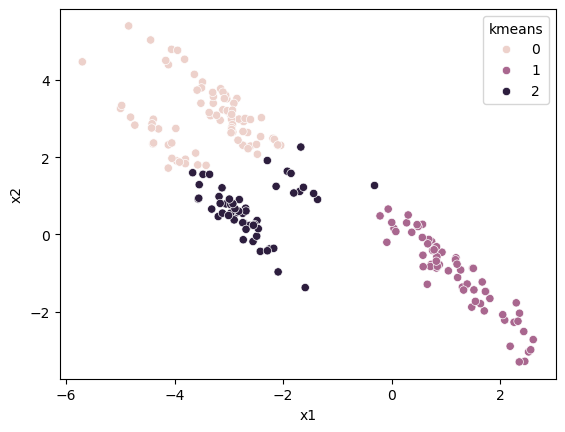

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

data = pd.read_csv('../data/skew.csv')

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
data['kmeans'] = kmeans.labels_

fig, ax = plt.subplots()
sns.scatterplot(x='x1', y='x2', hue='kmeans', data=data, ax=ax)
plt.show()

It is clear to us that there are three clusters and what data points are associated with each. 
However, the Euclidean nature of *k*-means clustering means that the *wrong* clusters are identified.

Gaussian mixture models (GMMs) are another clustering method that also follows an expectation-maximisation algorithm. 
GMMs can overcome the linearity issue of *k*-means. 
Let's see it in action.

````{margin}
```{note}
The `'kmeans'` label is dropped from `data` for running the GMM so that it does not influence the outcome.
```
````

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_data = data.drop('kmeans', axis=1)
gmm = GaussianMixture(n_components=3).fit(gmm_data)
data['gmm'] = gmm.predict(gmm_data)

fig, ax = plt.subplots()
sns.scatterplot(x='x1', y='x2', hue='gmm', data=data, ax=ax)
plt.show()

The Gaussian mixture models approach can capture this skew, which is impossible in *k*-means. 
We can now look at the algorithm to understand *why* this is possible. 